# **Data**

For our exercises we will use two different datasets:
- The AG News subset that features english news articles of 4 different categories
- The 10kGNAD dataset that features german news articles of 9 different categories

In [17]:
import csv
import pandas as pd

# english data
classes_en = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
train_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/train.csv", 
                       names = ["Label", "Title", "Article"],
                       encoding = "utf-8")
test_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/test.csv", 
                      names = ["Label", "Title", "Article"],
                      encoding = "utf-8")

# german data
train_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/train.csv", 
                       sep = ";", names = ["Label", "Article"], 
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")
test_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/test.csv", 
                       sep = ";", names = ["Label", "Article"], 
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")

### The english dataset features 120 000 training and 7600 test samples with equally balanced classes

In [18]:
print(train_en.shape)
print(test_en.shape)
train_en.head()

(120000, 3)
(7600, 3)


,Label,Title,Article
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


<Axes: xlabel='Label'>

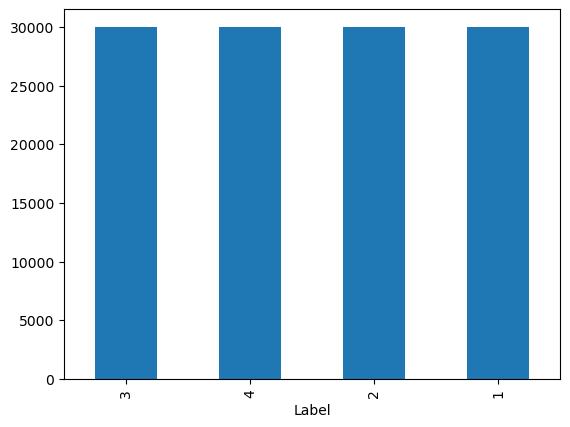

In [19]:
train_en["Label"].value_counts().plot(kind = "bar")

### The german dataset features 9245 training and 1028 test samples with rather unbalanced classes

In [20]:
print(train_de.shape)
print(test_de.shape)
train_de.head()

(9245, 2)
(1028, 2)


,Label,Article
0,Sport,21-Jähriger fällt wohl bis Saisonende aus. Wie...
1,Kultur,"Erfundene Bilder zu Filmen, die als verloren g..."
2,Web,Der frischgekürte CEO Sundar Pichai setzt auf ...
3,Wirtschaft,"Putin: ""Einigung, dass wir Menge auf Niveau vo..."
4,Inland,Estland sieht den künftigen österreichischen P...


<Axes: xlabel='Label'>

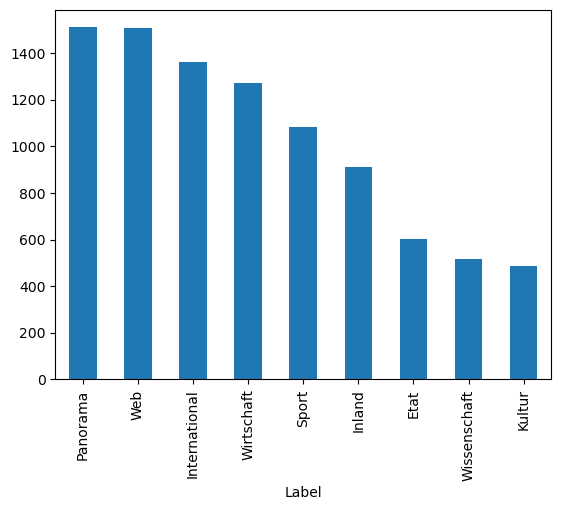

In [21]:
train_de["Label"].value_counts().plot(kind = "bar")

# **spaCy**

spaCy is a natural language processing library that comes with many built-in features that solve core linguistic tasks.  
The following exercises should be carried out by getting familiar with the spaCy API. The documentation can be found at:

[https://spacy.io/usage](https://spacy.io/usage)

spaCy needs a language model to analyze text, we will work with both the english and the german language models which can be downloaded by executing the following:

In [22]:
%%capture output
!python -m spacy download en_core_web_sm

In [23]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [24]:
%%capture output
!python -m spacy download en_core_web_lg

In [25]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [26]:
%%capture output
!python -m spacy download de_core_news_sm

In [27]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [28]:
%%capture output
!python -m spacy download de_core_news_lg

In [29]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


### Loading models

In [149]:
import spacy
import random
import en_core_web_lg
import de_core_news_lg

nlp_en = en_core_web_lg.load()
nlp_de = de_core_news_lg.load()

### Use spaCy to tokenize a random Article of both the english and the german dataset

In [150]:
# select a random english article
r_en = random.randint(0, train_en.shape[0] - 1)
# your code here
random_en_article = train_en.iloc[r_en]["Article"]

# tokenize
tokens_en = nlp_en(random_en_article)

# print tokens (only first 20)
print([token.text for token in tokens_en])

['The', 'Belgians', 'must', 'be', 'proud', '.', 'The', 'reinstated', 'and', ',', 'looking', 'at', 'the', 'new', 'Bus', 'Stop', 'chicane', ',', 'one', 'might', 'say', 'reincarnated', 'Spa', 'proved', 'its', 'worth', 'on', 'Sunday', 'with', 'an', 'enthralling', ',', 'magnificently', 'dramatic', 'race', '-', 'certainly', 'the', 'best', 'of', 'the', 'year', 'so', 'far', '.']


In [151]:
# select a random german article
r_de = random.randint(0, train_de.shape[0] - 1)
# your code here
random_de_article = train_de.iloc[r_de]["Article"]

# tokenize
tokens_de = nlp_de(random_de_article)

# print tokens (only first 20)
print([token.text for token in tokens_de])

['Zehn', 'Millionen', 'Einwohner', 'auf', 'Nahrungsmittelhilfe', 'angewiesen', '–', 'Kurz', 'besucht', 'afrikanisches', 'Land', '.', 'Addis', 'Abeba', '–', 'Äthiopien', 'wird', 'nach', 'Uno-Angaben', 'derzeit', 'von', 'der', 'schlimmsten', 'Dürre', 'seit', '30', 'Jahren', 'heimgesucht', 'und', 'benötigt', 'deshalb', 'sofortige', 'Hilfe', '.', 'Bereits', 'jetzt', 'seien', '10,2', 'Millionen', 'Äthiopier', 'auf', 'Nahrungsmittelhilfe', 'angewiesen', ',', 'in', 'wenigen', 'Monaten', 'könne', 'sich', 'die', 'Zahl', 'verdoppeln', ',', 'sagte', 'Uno-Generalsekretär', 'Ban', 'Ki-moon', 'am', 'Sonntag', 'beim', 'Gipfel', 'der', 'Afrikanischen', 'Union', '(', 'AU', ')', 'in', 'der', 'äthiopischen', 'Hauptstadt', 'Addis', 'Abeba', '.', 'Sein', 'Land', 'benötigte', 'umgerechnet', '1,3', 'Milliarden', 'Euro', 'zur', 'Krisenbewältigung', ',', 'sagte', 'der', 'äthiopische', 'Vize-Regierungschef', 'Demeke', 'Mekonnen', '.', 'Er', 'wies', 'auf', 'den', 'Zusammenhang', 'zwischen', 'der', 'Dürre', 'und'

### Use spaCy to lemmatize a random Article of both the english and the german dataset

In [152]:
print([token.lemma_ for token in tokens_en])

['the', 'Belgians', 'must', 'be', 'proud', '.', 'the', 'reinstate', 'and', ',', 'look', 'at', 'the', 'new', 'Bus', 'Stop', 'chicane', ',', 'one', 'might', 'say', 'reincarnate', 'Spa', 'prove', 'its', 'worth', 'on', 'Sunday', 'with', 'an', 'enthralling', ',', 'magnificently', 'dramatic', 'race', '-', 'certainly', 'the', 'good', 'of', 'the', 'year', 'so', 'far', '.']


In [153]:
print([token.lemma_ for token in tokens_de])

['zehn', 'Million', 'Einwohner', 'auf', 'Nahrungsmittelhilfe', 'angewiesen', '--', 'kurz', 'besuchen', 'afrikanisch', 'Land', '--', 'Addis', 'Abeba', '--', 'Äthiopien', 'werden', 'nach', 'Uno-Angaben', 'derzeit', 'von', 'der', 'schlimm', 'Dürre', 'seit', '30', 'Jahr', 'heimsuchen', 'und', 'benötigen', 'deshalb', 'sofortig', 'Hilfe', '--', 'bereits', 'jetzt', 'sein', '10,2', 'Million', 'Äthiopier', 'auf', 'Nahrungsmittelhilfe', 'angewiesen', '--', 'in', 'weniger', 'Monat', 'können', 'sich', 'der', 'Zahl', 'verdoppeln', '--', 'sagen', 'Uno-Generalsekretär', 'Ban', 'Ki-moon', 'an', 'Sonntag', 'bei', 'Gipfel', 'der', 'afrikanisch', 'Union', '--', 'AU', '--', 'in', 'der', 'äthiopisch', 'Hauptstadt', 'Addis', 'Abeba', '--', 'sein', 'Land', 'benötigen', 'umgerechnet', '1,3', 'Milliarde', 'Euro', 'zu', 'Krisenbewältigung', '--', 'sagen', 'der', 'äthiopisch', 'Vize-Regierungschef', 'Demeke', 'Mekonn', '--', 'er', 'weisen', 'auf', 'der', 'Zusammenhang', 'zwischen', 'der', 'Dürre', 'und', 'der', 

### Use spaCy for Part-Of-Speech tagging of a random Article of both the english and the german dataset

- Either print the token attributes or visualize them as a table!
- What do the attributes describe? -> linguistic properties of the processed text
- Visualize the POS attribute as a dependency plot with spaCy's displacy!
- Optional: For the german dataset visualize sentences separately for better readability.

In [154]:
tokens_en_data = [{
        'Token': token.text,
        'Lemma': token.lemma_,
        'POS': token.pos_,
        'Tag': token.tag_,
        'Dep': token.dep_,
        'Shape': token.shape_,
        'Is_alpha': token.is_alpha,
        'Is_stop': token.is_stop
    } for token in tokens_en]

print(pd.DataFrame(tokens_en_data))

            Token          Lemma    POS   Tag        Dep  Shape  Is_alpha  \
0             The            the    DET    DT        det    Xxx      True   
1        Belgians       Belgians  PROPN  NNPS      nsubj  Xxxxx      True   
2            must           must    AUX    MD        aux   xxxx      True   
3              be             be    AUX    VB       ROOT     xx      True   
4           proud          proud    ADJ    JJ      acomp   xxxx      True   
5               .              .  PUNCT     .      punct      .     False   
6             The            the    DET    DT        det    Xxx      True   
7      reinstated      reinstate   VERB   VBN      nsubj   xxxx      True   
8             and            and  CCONJ    CC         cc    xxx      True   
9               ,              ,  PUNCT     ,      punct      ,     False   
10        looking           look   VERB   VBG       conj   xxxx      True   
11             at             at    ADP    IN       prep     xx      True   

In [155]:
from spacy import displacy

displacy.render(tokens_en, style='dep', options={'distance': 100}, jupyter=True)

In [156]:
tokens_de_data = [{
        'Token': token.text,
        'Lemma': token.lemma_,
        'POS': token.pos_,
        'Tag': token.tag_,
        'Dep': token.dep_,
        'Shape': token.shape_,
        'Is_alpha': token.is_alpha,
        'Is_stop': token.is_stop
    } for token in tokens_de]

print(pd.DataFrame(tokens_de_data))

                   Token                Lemma    POS   Tag    Dep  Shape  \
0                   Zehn                 zehn    NUM  CARD    nmc   Xxxx   
1              Millionen              Million   NOUN    NN   ROOT  Xxxxx   
2              Einwohner            Einwohner   NOUN    NN     nk  Xxxxx   
3                    auf                  auf    ADP  APPR     mo    xxx   
4    Nahrungsmittelhilfe  Nahrungsmittelhilfe   NOUN    NN     nk  Xxxxx   
..                   ...                  ...    ...   ...    ...    ...   
286                    –                   --  PUNCT    $(  punct      –   
287                  auf                  auf    ADP  APPR    mnr    xxx   
288                  dem                  der    DET   ART     nk    xxx   
289             Programm             Programm   NOUN    NN     nk  Xxxxx   
290                    .                   --  PUNCT    $.  punct      .   

     Is_alpha  Is_stop  
0        True     True  
1        True    False  
2        Tru

In [157]:
displacy.render(tokens_de, style='dep', options={'distance': 100}, jupyter=True)

### Use spaCy for Named Entity Recognition (NER) of a random Article of both the english and the german dataset

- Either print the entity attributes or visualize them as a table!
- Visualize the entities as an entity plot with spaCy's displacy!

In [158]:
entities_en_data = [{'Text': ent.text, 'Start_char': ent.start_char, 'End_char': ent.end_char, 'Label': ent.label_} for ent in tokens_en.ents]
print(pd.DataFrame(entities_en_data))

       Text  Start_char  End_char    Label
0  Belgians           4        12     NORP
1  Bus Stop          67        75  PRODUCT
2       Spa         112       115      ORG
3    Sunday         136       142     DATE
4  the year         216       224     DATE


In [159]:
displacy.render(tokens_en, style='ent', options={'distance': 100}, jupyter=True)

In [160]:
entities_de_data = [{'Text': ent.text, 'Start_char': ent.start_char, 'End_char': ent.end_char, 'Label': ent.label_} for ent in tokens_de.ents]
print(pd.DataFrame(entities_de_data))

                              Text  Start_char  End_char Label
0               afrikanisches Land          75        93   LOC
1                      Addis Abeba          95       106   LOC
2                        Äthiopien         109       118   LOC
3                      Uno-Angaben         129       140   LOC
4                        Äthiopier         275       284   LOC
5           Ban Ki-moon am Sonntag         398       420   PER
6              Afrikanischen Union         437       456   ORG
7                               AU         458       460   ORG
8                     äthiopischen         469       481  MISC
9                      Addis Abeba         493       504   LOC
10                     äthiopische         591       602  MISC
11                 Demeke Mekonnen         623       638   PER
12                         El Niño         711       718  MISC
13                       Äthiopier         755       764   LOC
14                   Golf von Aden         774       78

In [161]:
displacy.render(tokens_de, style='ent', options={'distance': 100}, jupyter=True)

### We can also use spaCy to calculate the similarity between a german and an english article

- Read also: [https://spacy.io/usage/spacy-101#vectors-similarity](https://spacy.io/usage/spacy-101#vectors-similarity)

In [162]:
tokens_de.similarity(tokens_en)

-0.03877478015681793

In [163]:
fruits = nlp_en("apple banana")
fruits[0].similarity(fruits[1])

0.6646699905395508

### spaCy also encodes documents and tokens as feature vectors (we might come back to this later on)

In [164]:
token = tokens_en[0]
print(token.vector.shape)
print(tokens_en.vector.shape)

(300,)
(300,)
